# Reference: 
PHYSICAL REVIEW B 90, 155451 (2014) \
Atomic corrugation and electron localization due to Moir ́e patterns in twisted bilayer graphenes \
Kazuyuki Uchida, Shinnosuke Furuya, Jun-Ichi Iwata, and Atsushi Oshiyama

# Unitcell plot

In [133]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

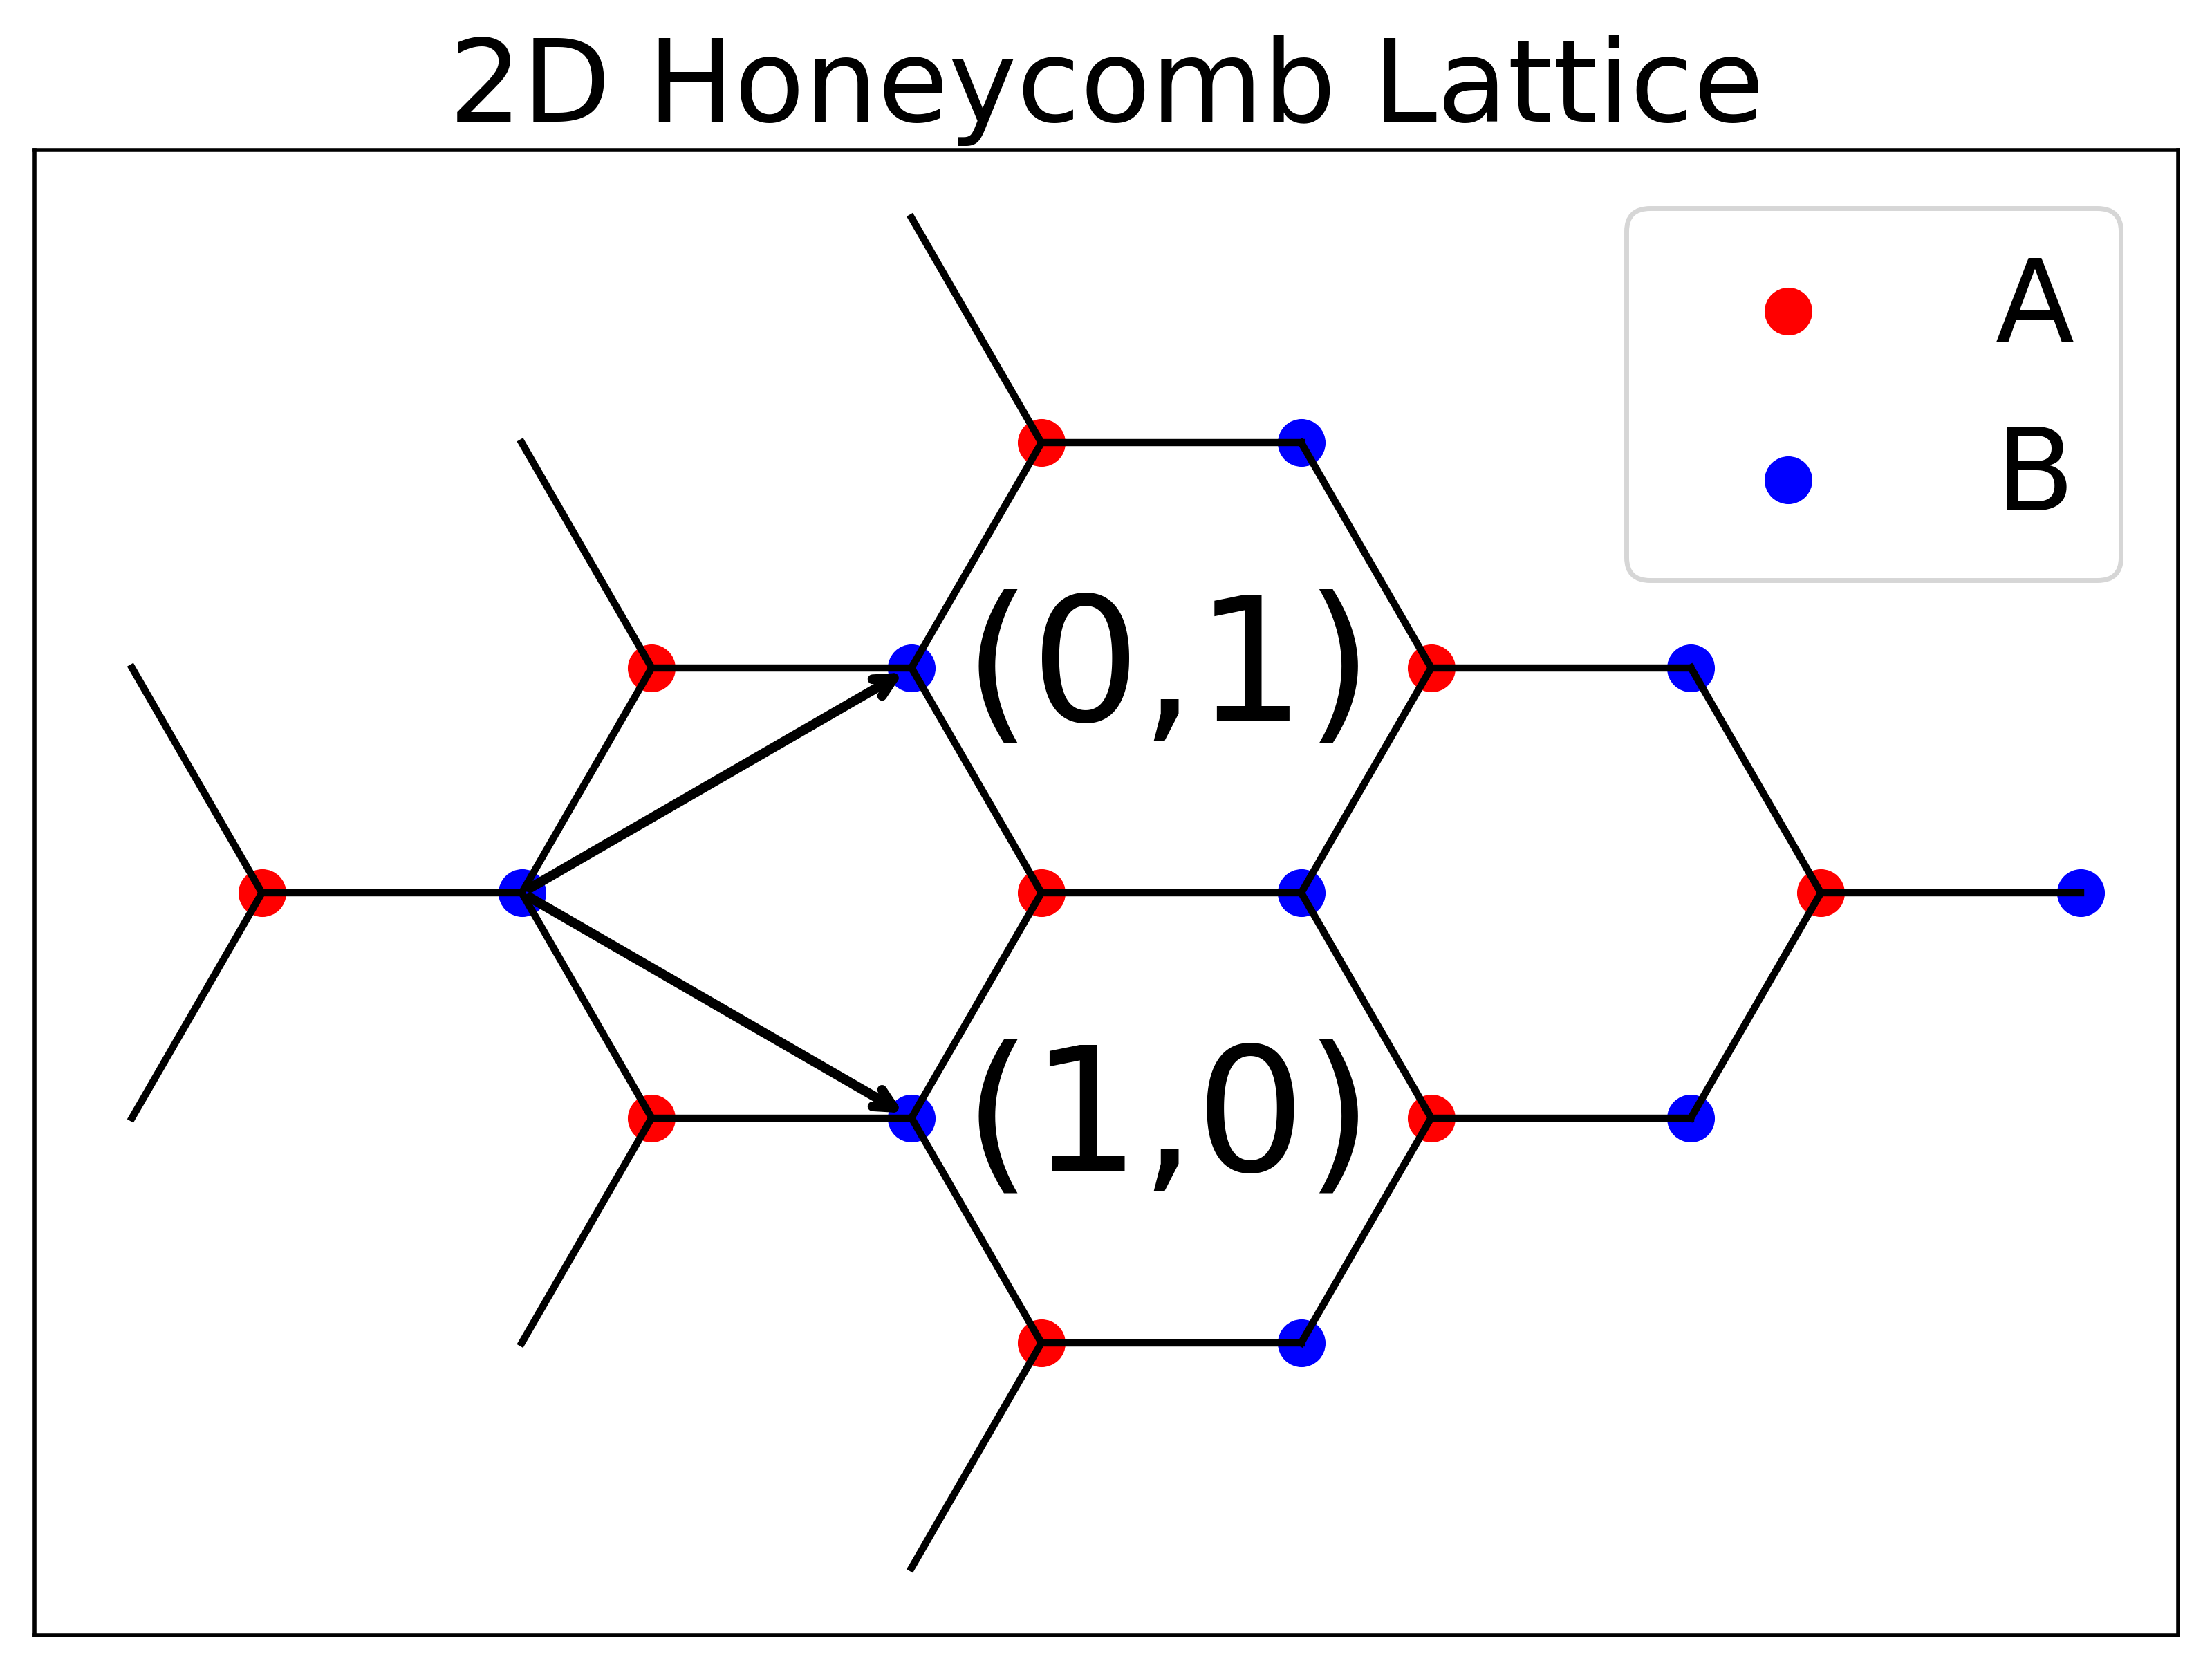

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice vectors for the honeycomb lattice
a1 = np.array([1.5, -np.sqrt(3)/2])
a2 = np.array([1.5, np.sqrt(3)/2])
delta = np.array([1.0, 0.0])  # Offset for second sublattice

# Number of cells in each direction
n1, n2 = 1, 1

# Generate lattice sites
A_sites, B_sites = [], []
for i in range(-n1, n1+1):
    for j in range(-n2, n2+1):
        r = i * a1 + j * a2
        A_sites.append(r)
        B_sites.append(r + delta)

A = np.array(A_sites)
B = np.array(B_sites)

# Plotting
fig, ax = plt.subplots(figsize=(8,6))
# A sublattice: red filled circles
ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=80, label='A')
# B sublattice: blue filled circles
ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=80, label='B')

# Draw bonds between nearest neighbors in black
neighbor_vectors = np.array([
    [1.0, 0.0],
    [-0.5, np.sqrt(3)/2],
    [-0.5, -np.sqrt(3)/2]
])
for r in A:
    for v in neighbor_vectors:
        ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k')

# Remove ticks and numbers on x and y axes
ax.set_xticks([])
ax.set_yticks([])

# Identify the leftmost B site
idx_leftmost = np.argmin(B[:, 0])
B0 = B[idx_leftmost]

# Compute neighbors corresponding to lattice shifts (1,0) and (0,1)
B1 = B0 + a1  # (1,0)
B2 = B0 + a2  # (0,1)

# Draw arrows representing (1,0) and (0,1)
ax.annotate('', xy=B1, xytext=B0, arrowprops=dict(arrowstyle='->', color='k', lw=2))
ax.annotate('', xy=B2, xytext=B0, arrowprops=dict(arrowstyle='->', color='k', lw=2))

# Label the arrows
ax.text(*(B1 + np.array([0.2, -0.2])), '(1,0)', fontsize=36, color='k')
ax.text(*(B2 + np.array([0.2, -0.2])), '(0,1)', fontsize=36, color='k')

ax.set_aspect('equal')
ax.set_title('2D Honeycomb Lattice', fontsize=24)
ax.legend(loc='upper right', fontsize=24)
plt.show()

# Supercell plot

In [135]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

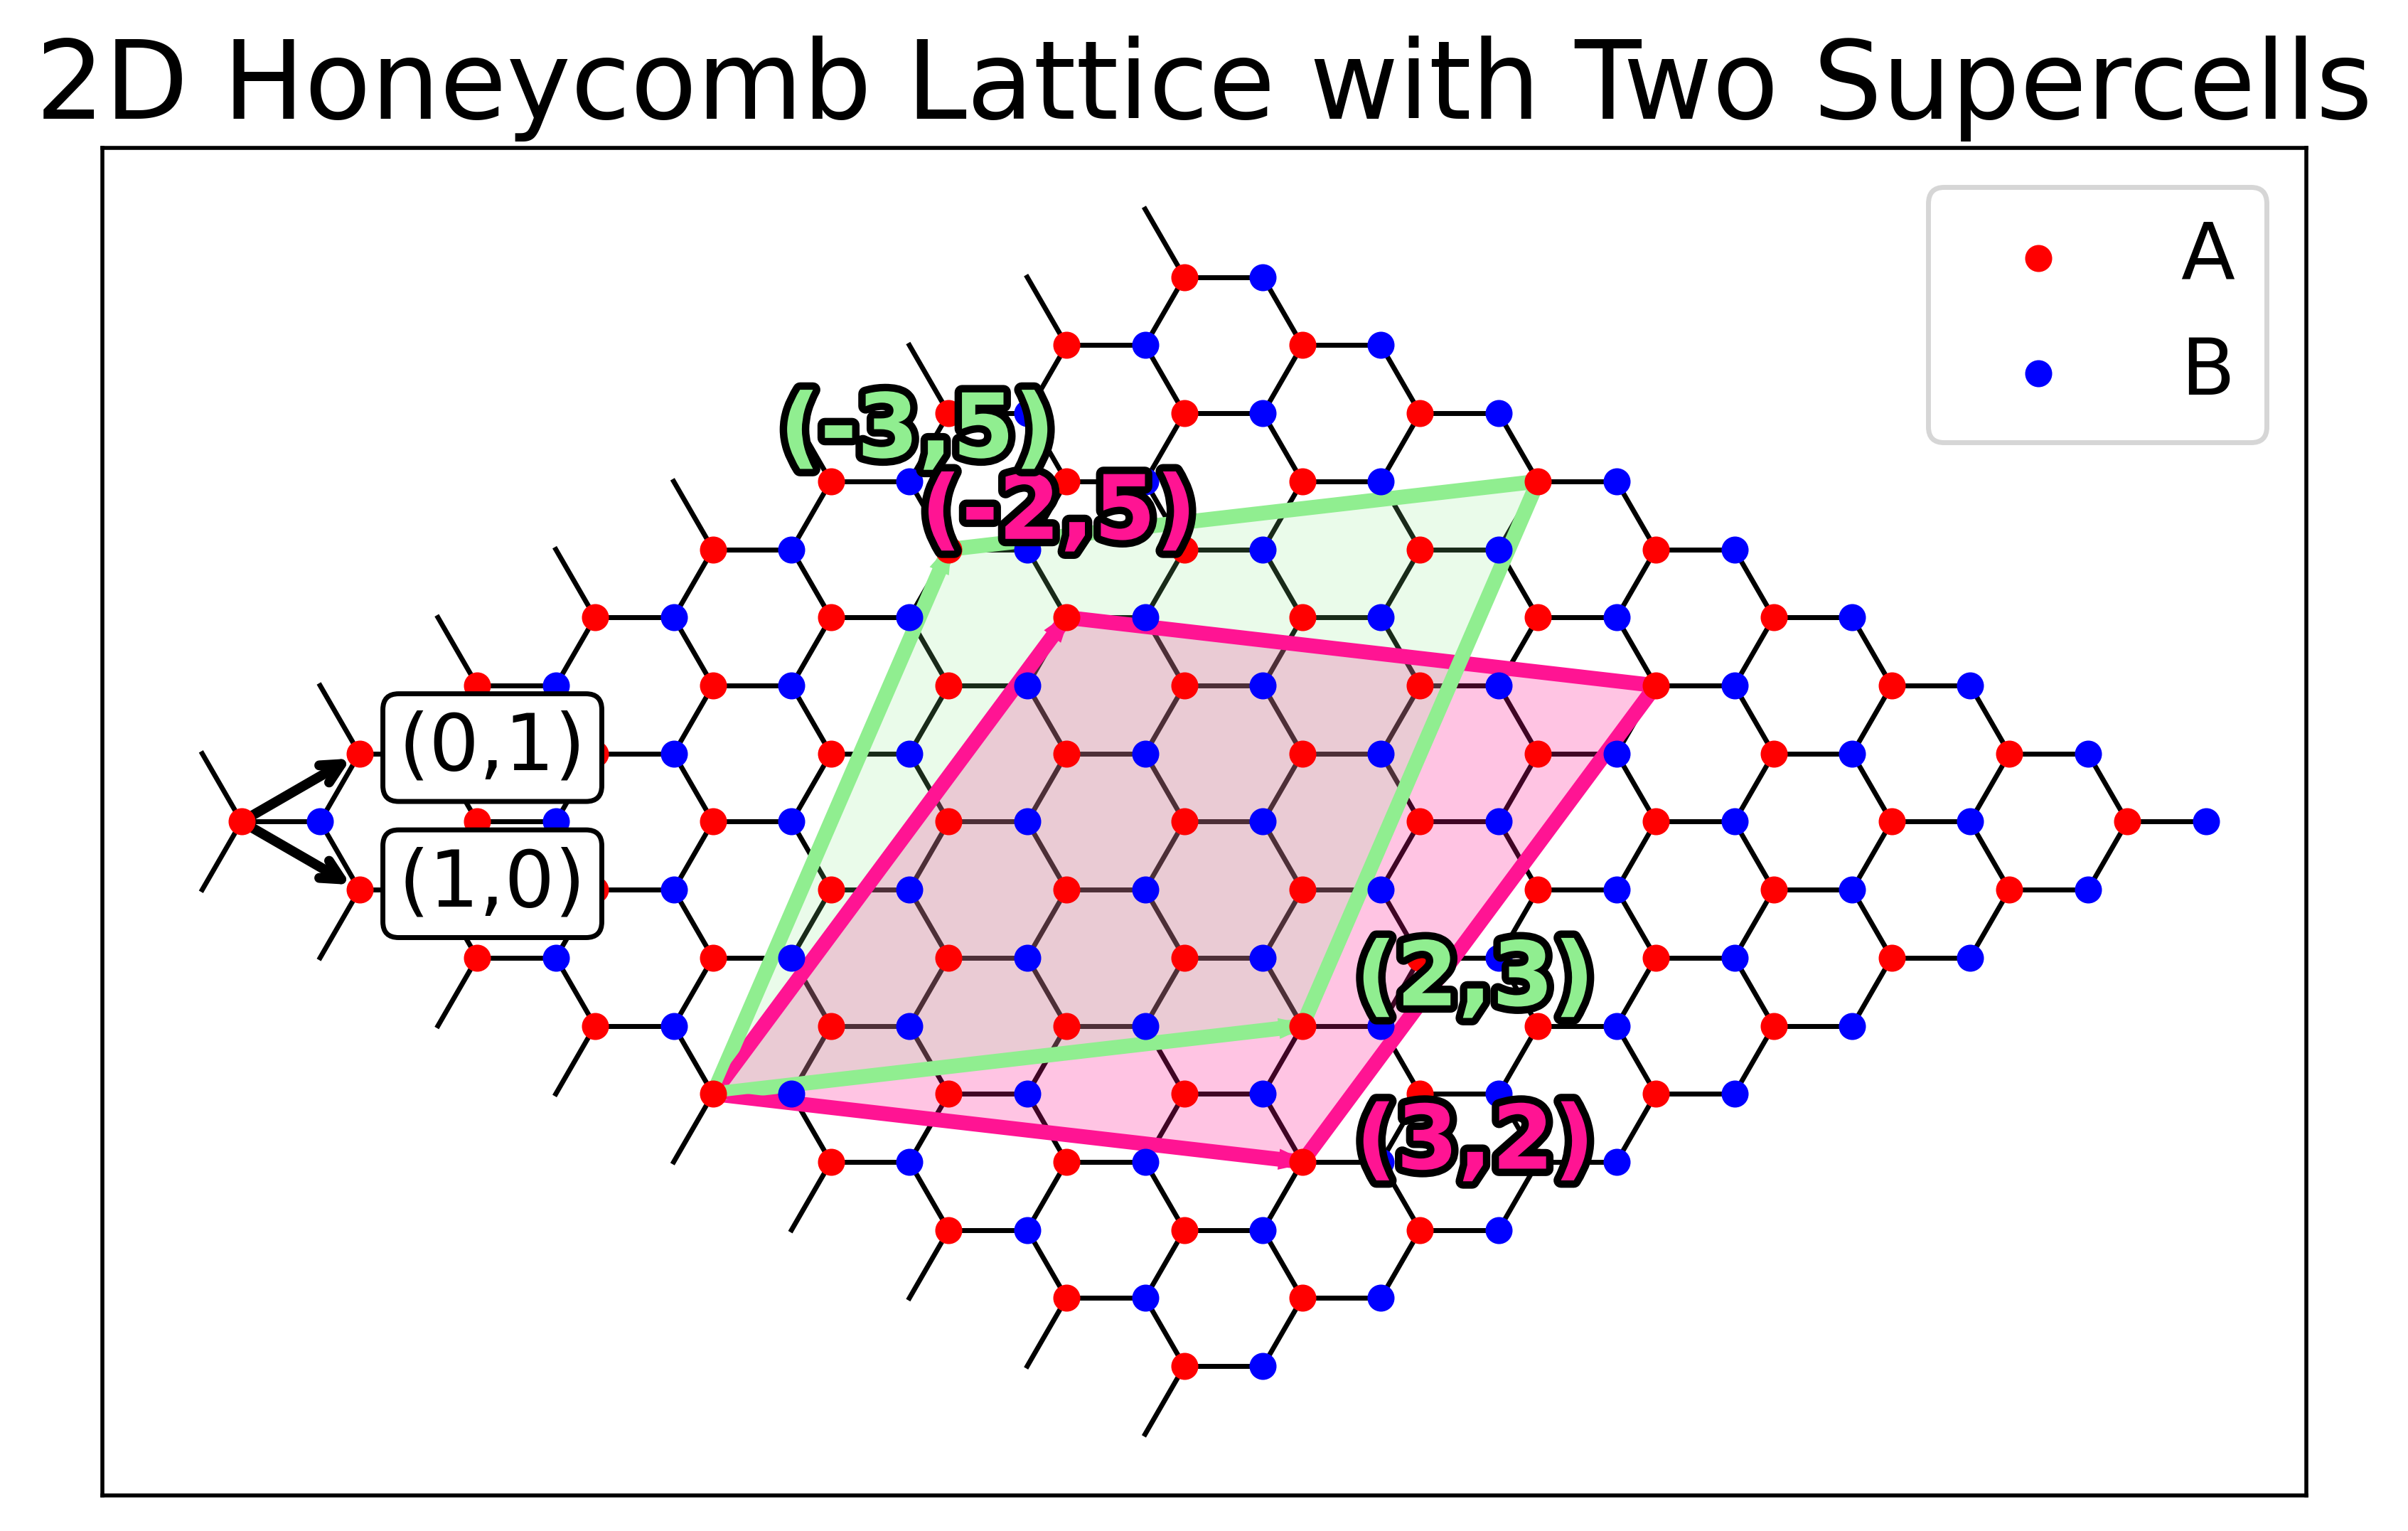

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def plot_double_supercell(N, M, n1=4, n2=4):
    # Define primitive lattice vectors for the honeycomb structure
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # Shift for B sublattice

    # Generate all lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sublattice sites
    ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=20, label='A', zorder=6)
    ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=20, label='B', zorder=6)

    # Draw nearest neighbor bonds for A sublattice
    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    for r in A:
        for v in neighbor_vectors:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the third A site from the left on the row closest to y=0
    tol = 0.1
    mask = np.abs(A[:, 1]) < tol
    A_xsorted = A[mask][np.argsort(A[mask][:, 0])]
    if len(A_xsorted) < 3:
        raise ValueError("Not enough A sites near the x-axis; try increasing n1/n2.")
    A_top = A_xsorted[2]  # 3rd from the left on y ≈ 0 row

    # Find all A sites with similar x, and y less than A_top (i.e., directly below A_top)
    x_tol = 0.2
    candidates = A[(np.abs(A[:, 0] - A_top[0]) < x_tol) & (A[:, 1] < A_top[1] - 1e-6)]
    # Sort these candidates by y ascending (from near to far downward)
    y_sorted = candidates[np.argsort(candidates[:, 1])]
    if len(y_sorted) < 2:
        raise ValueError("Not enough A sites below the reference; try increasing n1/n2.")
    A0 = y_sorted[0]  # Select the second one: two rows below A_top (supercell origin)

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    corners_red = np.array([
        A0,
        A0 + L1_red,
        A0 + L1_red + L2_red,
        A0 + L2_red,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='deeppink', alpha=0.25, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_red[0], L1_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)
    ax.arrow(A0[0], A0[1], L2_red[0], L2_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)

    # Green supercell: (M, N), (-N, M+N)
    L1_green = M * a1 + N * a2
    L2_green = -N * a1 + (M + N) * a2
    corners_green = np.array([
        A0,
        A0 + L1_green,
        A0 + L1_green + L2_green,
        A0 + L2_green,
        A0
    ])
    ax.fill(corners_green[:, 0], corners_green[:, 1], color='lightgreen', alpha=0.18, zorder=2)
    ax.plot(corners_green[:, 0], corners_green[:, 1], color='lightgreen', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_green[0], L1_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)
    ax.arrow(A0[0], A0[1], L2_green[0], L2_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)

    # Function to draw colored labels with black outline and farther from supercell edge
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(
            *xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
            path_effects=[withStroke(linewidth=3, foreground='black')],zorder=200
        )

    # Place labels well away from the vectors (increase the distance factor)
    offset_red1 = 1.2  # > 1.1
    offset_red2 = 1.2
    offset_green1 = 1.2
    offset_green2 = 1.2

    label_with_outline(A0 + offset_red1*L1_red + np.array([0.7, 0.4]), f'({N},{M})', 'deeppink', 18)
    label_with_outline(A0 + offset_red2*L2_red + np.array([-1.0, 0.1]), f'({-M},{N+M})', 'deeppink', 18)
    label_with_outline(A0 + offset_green1*L1_green + np.array([0.7, 0.4]), f'({M},{N})', 'lightgreen', 18)
    label_with_outline(A0 + offset_green2*L2_green + np.array([-1.0, 0.1]), f'({-N},{M+N})', 'lightgreen', 18)

    # Draw (1,0) and (0,1) from leftmost B site for reference
    idx_leftmost = np.argmin(B[:, 0])
    Bref = A[idx_leftmost]
    Bref1 = Bref + a1
    Bref2 = Bref + a2
    ax.annotate('', xy=Bref1, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.annotate('', xy=Bref2, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.text(*(Bref1 + np.array([0.5, -0.2])), '(1,0)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.text(*(Bref2 + np.array([0.5, -0.2])), '(0,1)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.set_aspect('equal')
    ax.set_title('2D Honeycomb Lattice with Two Supercells', fontsize=22)
    ax.legend(loc='upper right', fontsize=16)
    plt.show()

# Example usage
plot_double_supercell(N=3, M=2)

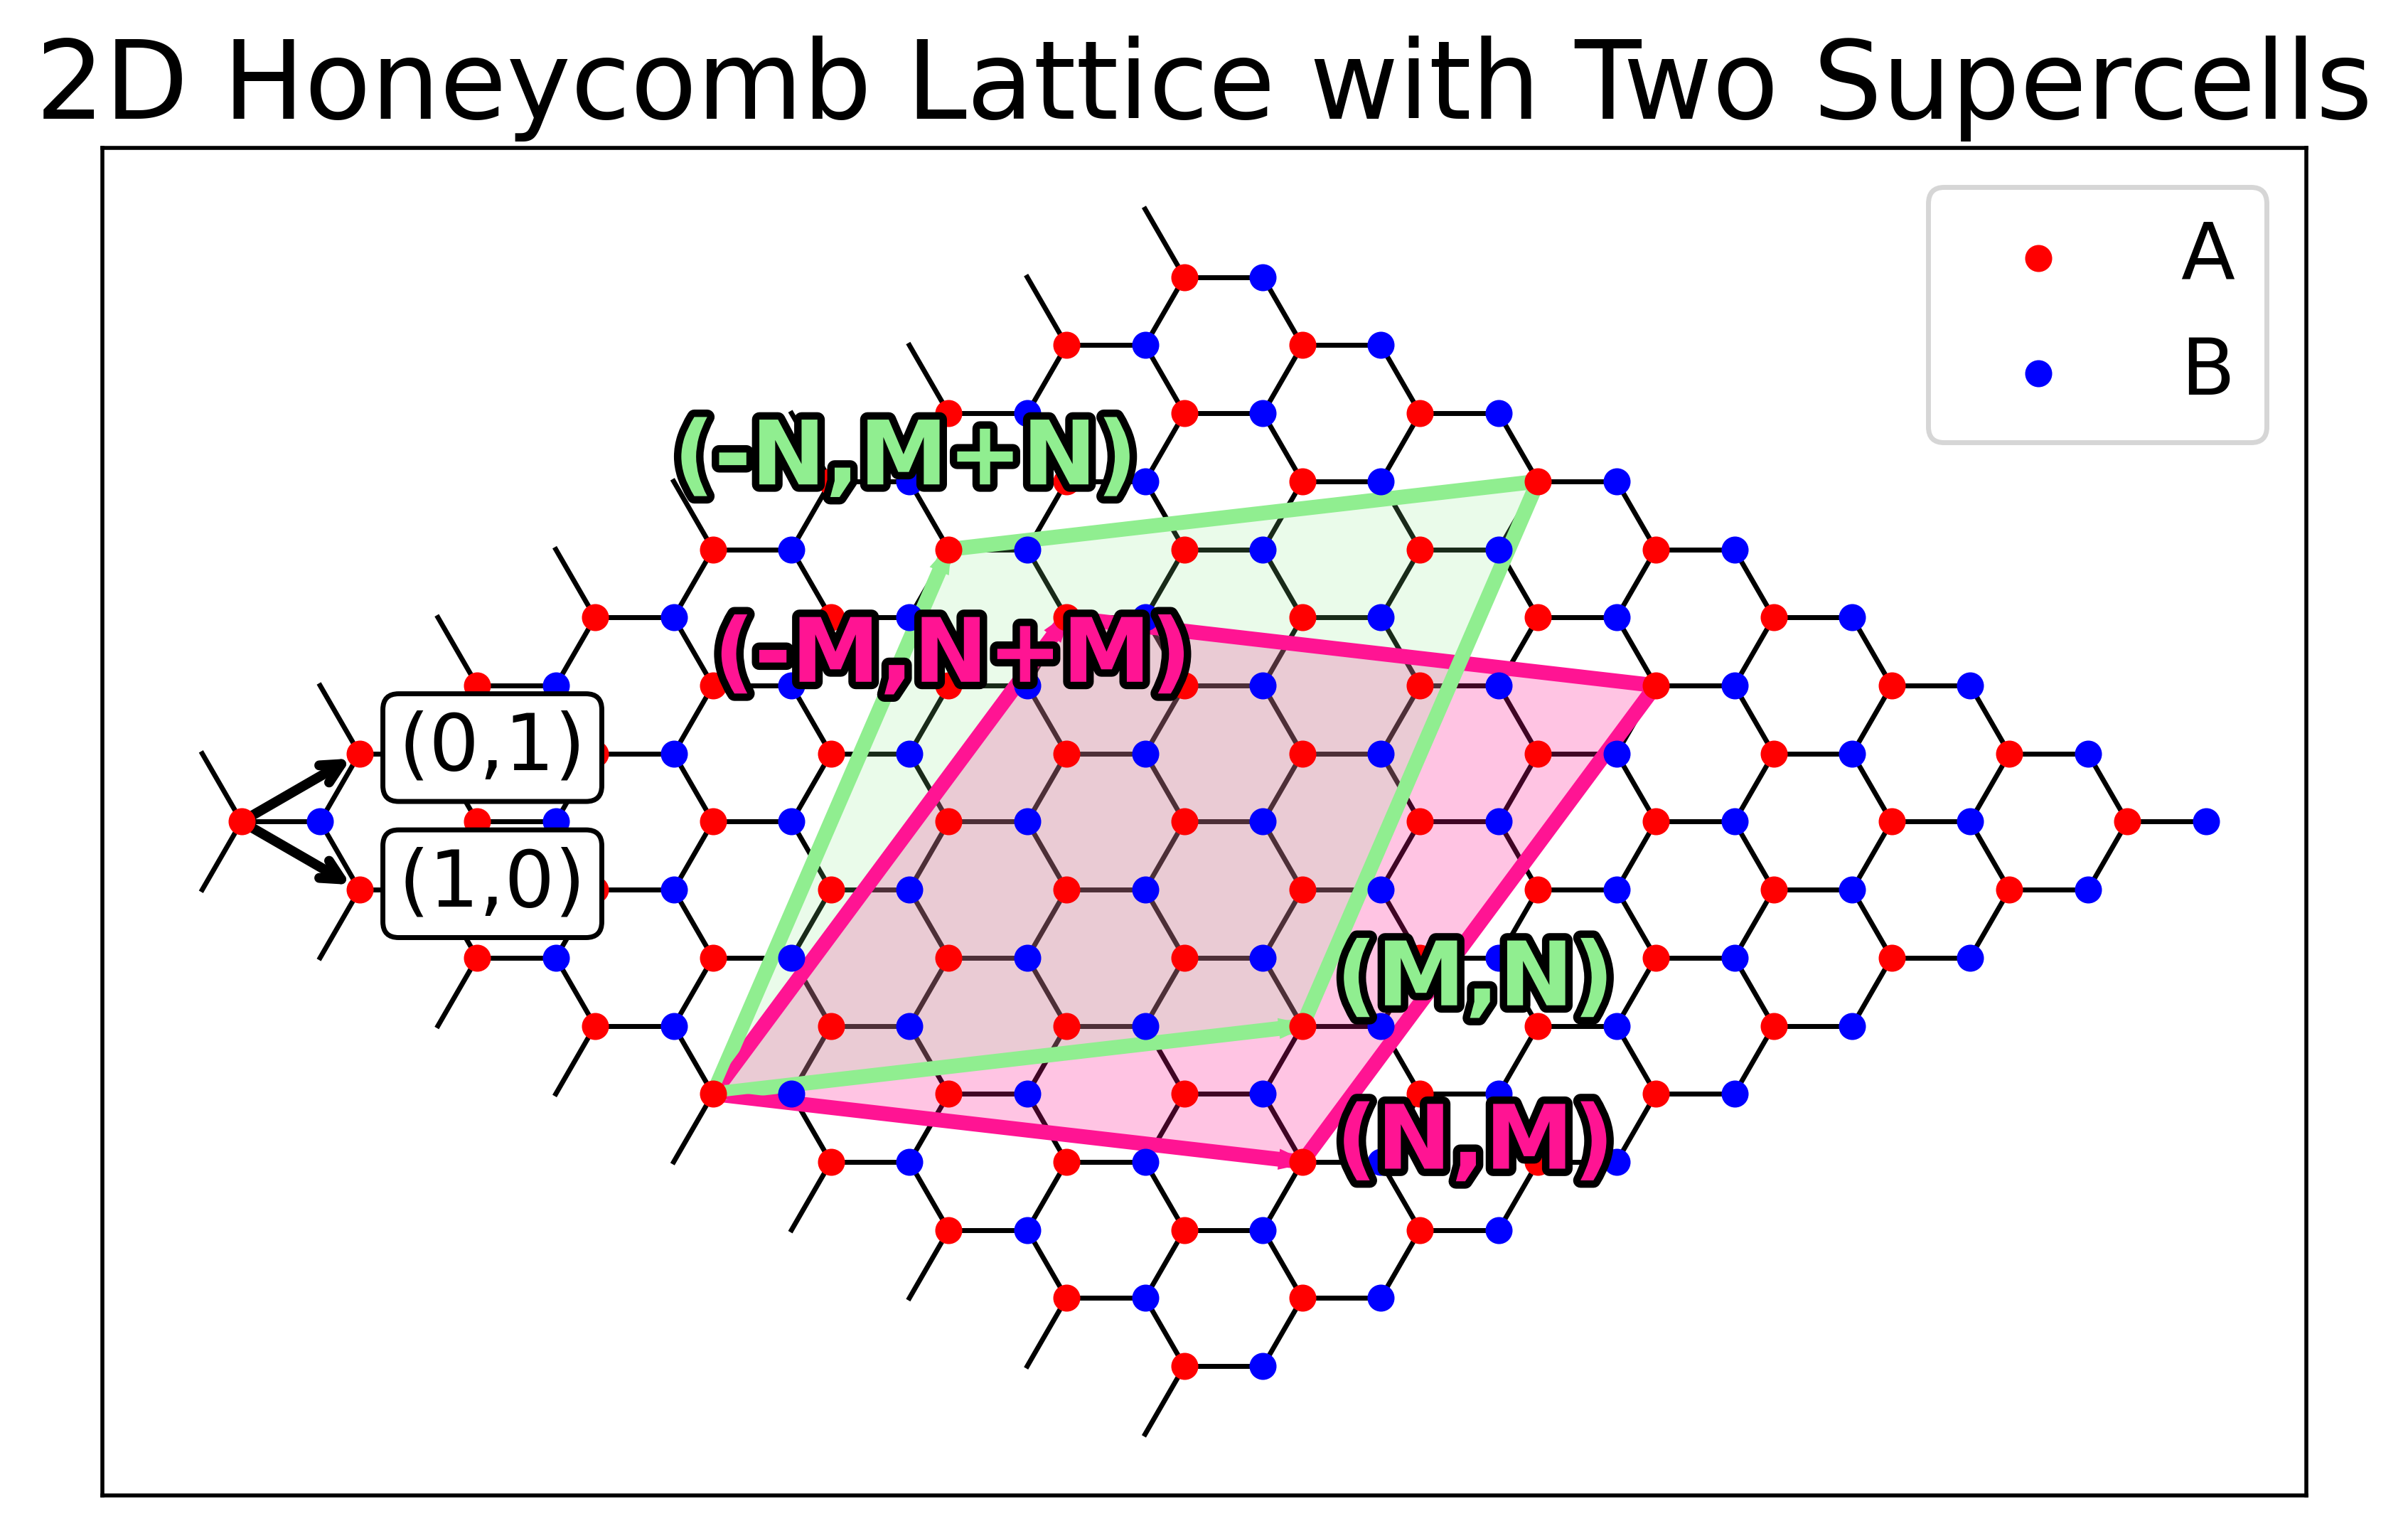

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def plot_double_supercell(N, M, n1=4, n2=4):
    # Define primitive lattice vectors for the honeycomb structure
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # Shift for B sublattice

    # Generate all lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sublattice sites
    ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=20, label='A', zorder=6)
    ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=20, label='B', zorder=6)

    # Draw nearest neighbor bonds for A sublattice
    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    for r in A:
        for v in neighbor_vectors:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the third A site from the left on the row closest to y=0
    tol = 0.1
    mask = np.abs(A[:, 1]) < tol
    A_xsorted = A[mask][np.argsort(A[mask][:, 0])]
    if len(A_xsorted) < 3:
        raise ValueError("Not enough A sites near the x-axis; try increasing n1/n2.")
    A_top = A_xsorted[2]  # 3rd from the left on y ≈ 0 row

    # Find all A sites with similar x, and y less than A_top (i.e., directly below A_top)
    x_tol = 0.2
    candidates = A[(np.abs(A[:, 0] - A_top[0]) < x_tol) & (A[:, 1] < A_top[1] - 1e-6)]
    # Sort these candidates by y ascending (from near to far downward)
    y_sorted = candidates[np.argsort(candidates[:, 1])]
    if len(y_sorted) < 2:
        raise ValueError("Not enough A sites below the reference; try increasing n1/n2.")
    A0 = y_sorted[0]  # Select the second one: two rows below A_top (supercell origin)

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    corners_red = np.array([
        A0,
        A0 + L1_red,
        A0 + L1_red + L2_red,
        A0 + L2_red,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='deeppink', alpha=0.25, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_red[0], L1_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)
    ax.arrow(A0[0], A0[1], L2_red[0], L2_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)

    # Green supercell: (M, N), (-N, M+N)
    L1_green = M * a1 + N * a2
    L2_green = -N * a1 + (M + N) * a2
    corners_green = np.array([
        A0,
        A0 + L1_green,
        A0 + L1_green + L2_green,
        A0 + L2_green,
        A0
    ])
    ax.fill(corners_green[:, 0], corners_green[:, 1], color='lightgreen', alpha=0.18, zorder=2)
    ax.plot(corners_green[:, 0], corners_green[:, 1], color='lightgreen', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_green[0], L1_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)
    ax.arrow(A0[0], A0[1], L2_green[0], L2_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)

    # Function to draw colored labels with black outline and farther from supercell edge
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(
            *xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
            path_effects=[withStroke(linewidth=3, foreground='black')],zorder=200
        )

    # Place labels well away from the vectors (increase the distance factor)
    offset_red1 = 1.2  # > 1.1
    offset_red2 = 0.9
    offset_green1 = 1.2
    offset_green2 = 1.15

    label_with_outline(A0 + offset_red1*L1_red + np.array([0.7, 0.4]), '(N,M)', 'deeppink', 18)
    label_with_outline(A0 + offset_red2*L2_red + np.array([-1.0, 0.1]), '(-M,N+M)', 'deeppink', 18)
    label_with_outline(A0 + offset_green1*L1_green + np.array([0.7, 0.4]), '(M,N)', 'lightgreen', 18)
    label_with_outline(A0 + offset_green2*L2_green + np.array([-1.0, 0.1]), '(-N,M+N)', 'lightgreen', 18)

    # Draw (1,0) and (0,1) from leftmost B site for reference
    idx_leftmost = np.argmin(B[:, 0])
    Bref = A[idx_leftmost]
    Bref1 = Bref + a1
    Bref2 = Bref + a2
    ax.annotate('', xy=Bref1, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.annotate('', xy=Bref2, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.text(*(Bref1 + np.array([0.5, -0.2])), '(1,0)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.text(*(Bref2 + np.array([0.5, -0.2])), '(0,1)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.set_aspect('equal')
    ax.set_title('2D Honeycomb Lattice with Two Supercells', fontsize=22)
    ax.legend(loc='upper right', fontsize=16)
    plt.show()

# Example usage
plot_double_supercell(N=3, M=2)

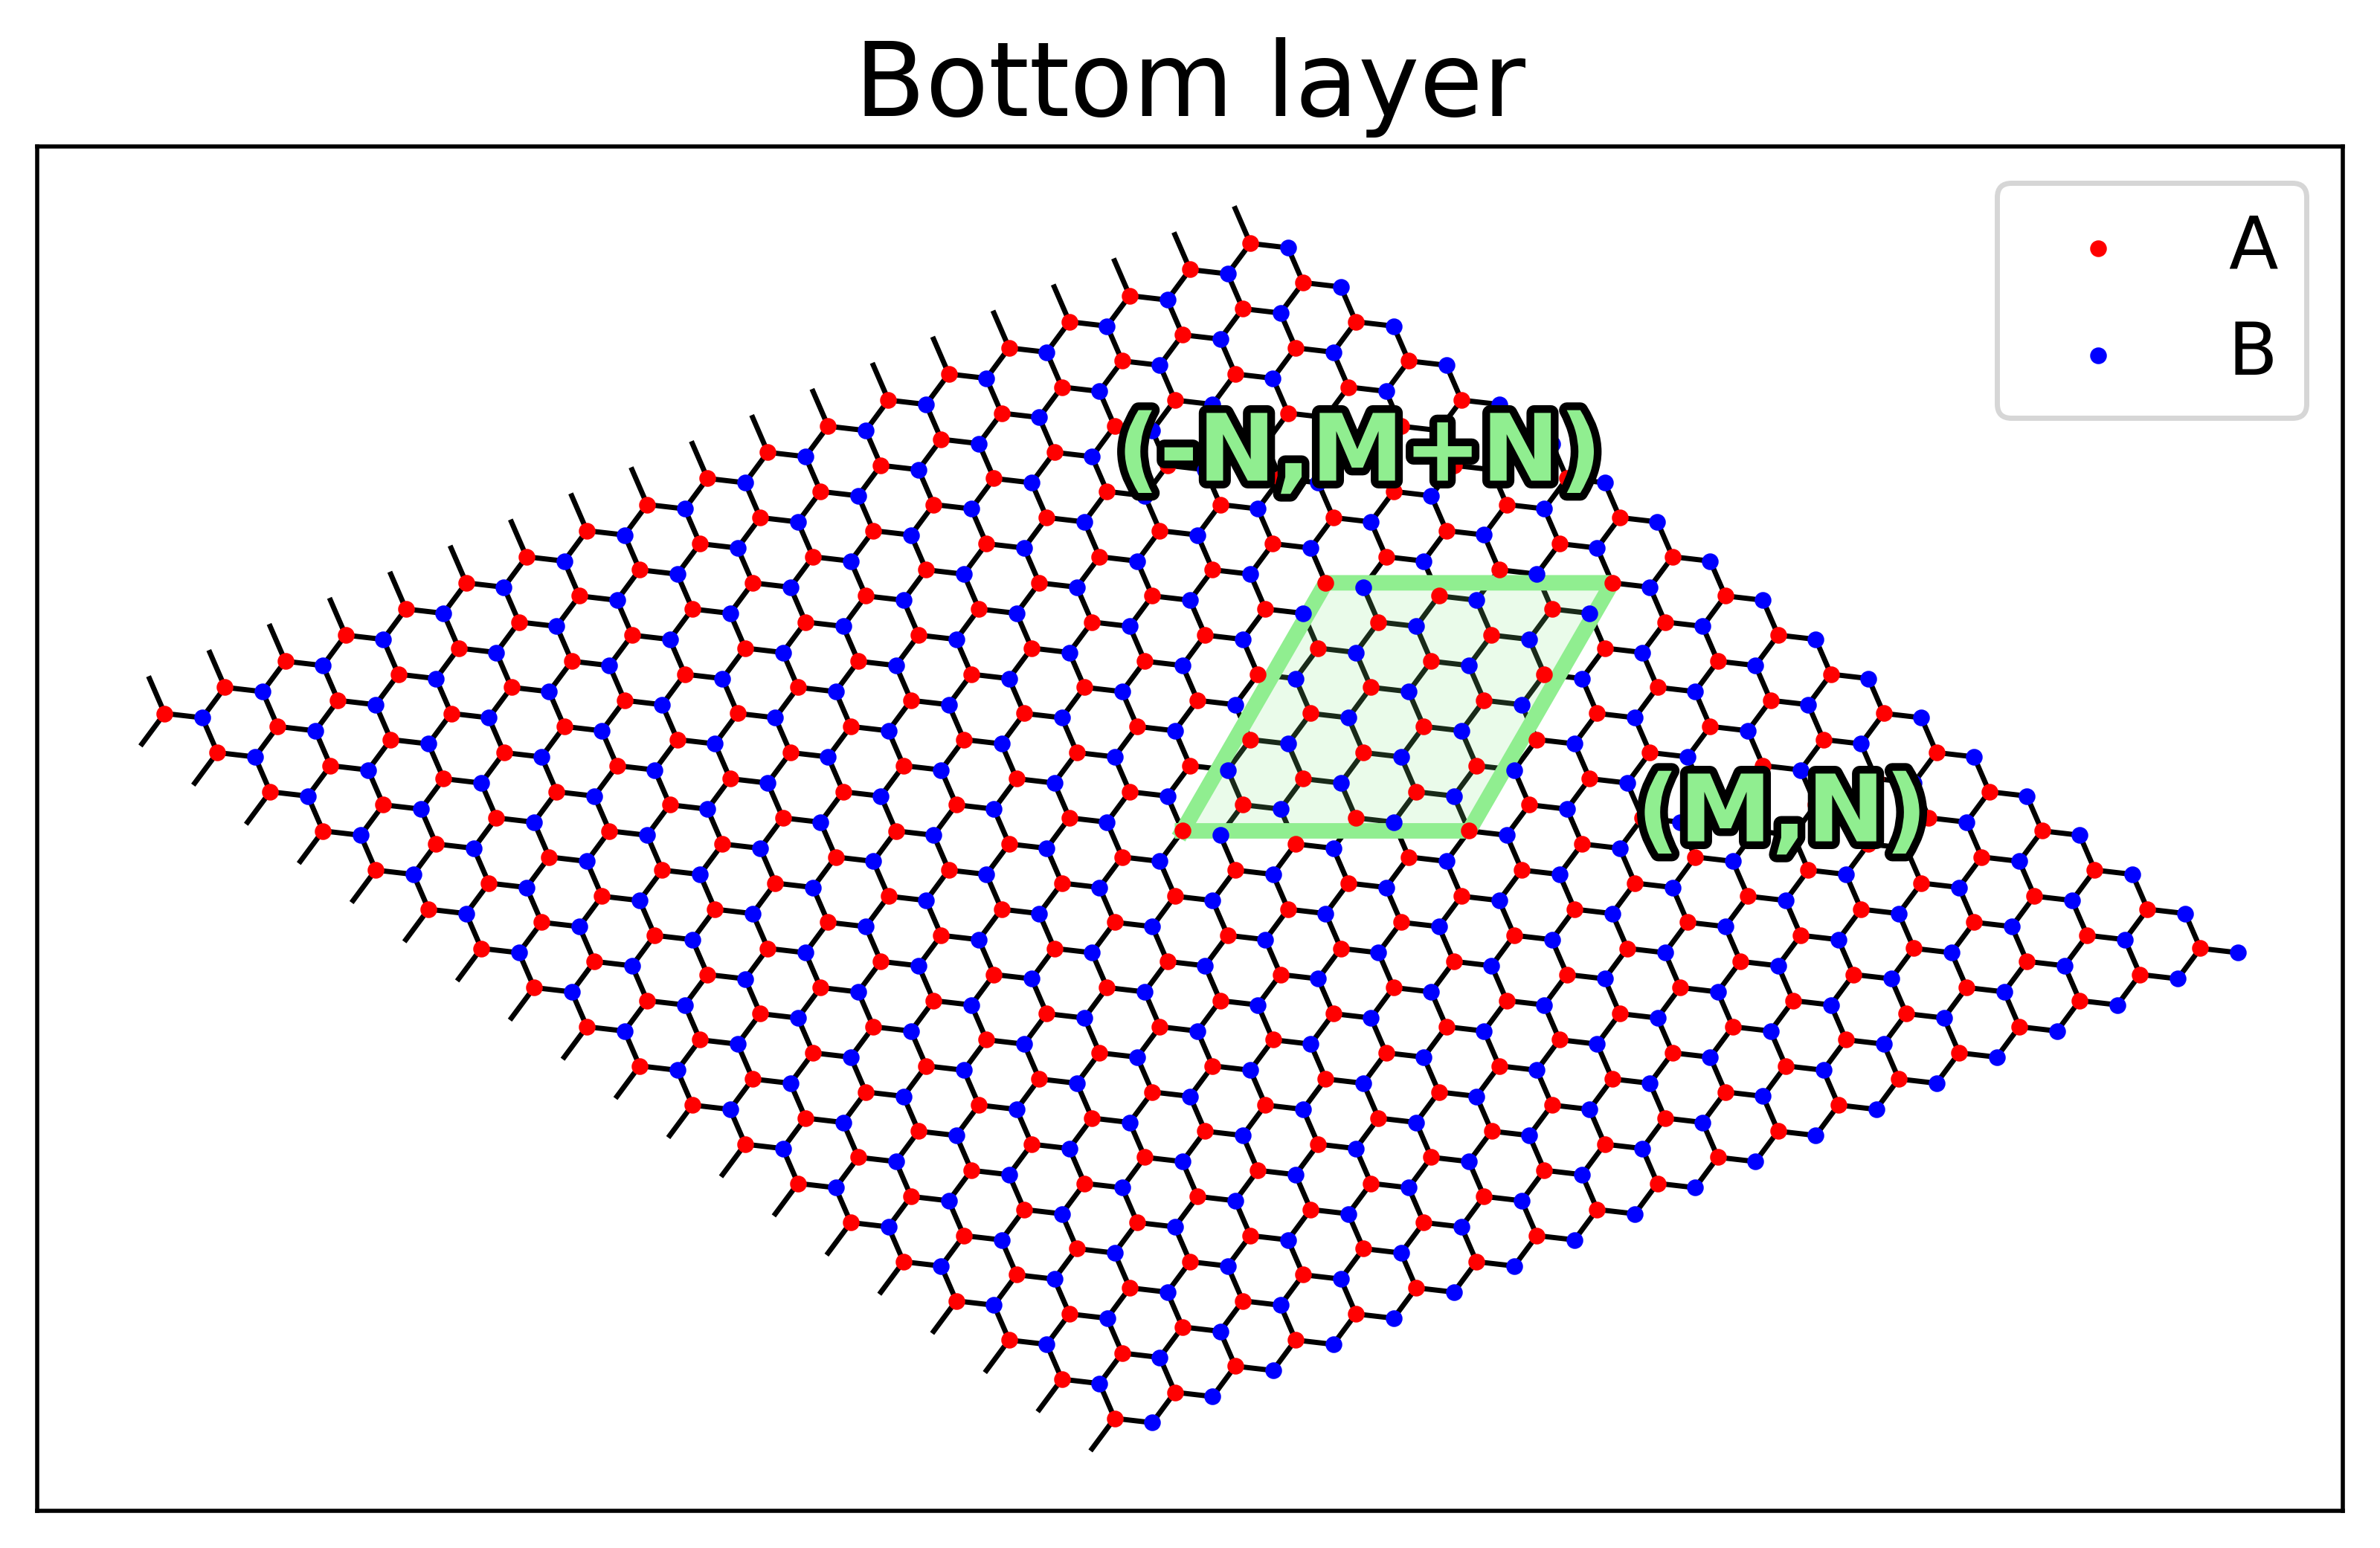

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def rotate_points(xy, theta_deg):
    """Rotate (N,2) array xy by theta_deg degrees about the origin."""
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return xy @ R.T

def plot_single_supercell(N, M, n1=9, n2=9, theta_deg=0):
    # Primitive lattice vectors
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # B-sublattice offset

    # Generate lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    # === Rotate all sites and bonds by -theta_deg about the origin ===
    A = rotate_points(A, -theta_deg)
    B = rotate_points(B, -theta_deg)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sites
    ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=5, label='A', zorder=6)
    ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=5, label='B', zorder=6)

    # Draw bonds for A sublattice
    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    # Rotate neighbor_vectors too!
    neighbor_vectors_rot = rotate_points(neighbor_vectors, -theta_deg)
    for r in A:
        for v in neighbor_vectors_rot:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the A site closest to the center (0,0) as the supercell origin
    A0 = A[np.argmin(np.linalg.norm(A, axis=1))]

    # Green supercell: (M, N), (-N, M+N)
    L1_green = M * a1 + N * a2
    L2_green = -N * a1 + (M + N) * a2
    # Rotate lattice vectors too!
    L1_green_rot = rotate_points(L1_green[None, :], -theta_deg)[0]
    L2_green_rot = rotate_points(L2_green[None, :], -theta_deg)[0]
    corners_green = np.array([
        A0,
        A0 + L1_green_rot,
        A0 + L1_green_rot + L2_green_rot,
        A0 + L2_green_rot,
        A0
    ])
    ax.fill(corners_green[:, 0], corners_green[:, 1], color='lightgreen', alpha=0.18, zorder=2)
    ax.plot(corners_green[:, 0], corners_green[:, 1], color='lightgreen', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_green_rot[0], L1_green_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='lightgreen', zorder=4)
    ax.arrow(A0[0], A0[1], L2_green_rot[0], L2_green_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='lightgreen', zorder=4)

    # Label supercell vectors, farther from lines
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(*xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
                path_effects=[withStroke(linewidth=3, foreground='black')], zorder=200)

    offset_green1 = 2
    offset_green2 = 1.5
    label_with_outline(A0 + offset_green1*L1_green_rot + np.array([0.7, 0.4]), '(M,N)', 'lightgreen', 18)
    label_with_outline(A0 + offset_green2*L2_green_rot + np.array([-1.0, 0.1]), '(-N,M+N)', 'lightgreen', 18)

    ax.set_aspect('equal')
    ax.set_title('Bottom layer', fontsize=20)
    ax.legend(loc='upper right', fontsize=14)
    plt.show()

# Example usage
plot_single_supercell(N=3, M=2, theta_deg=13.17/2)

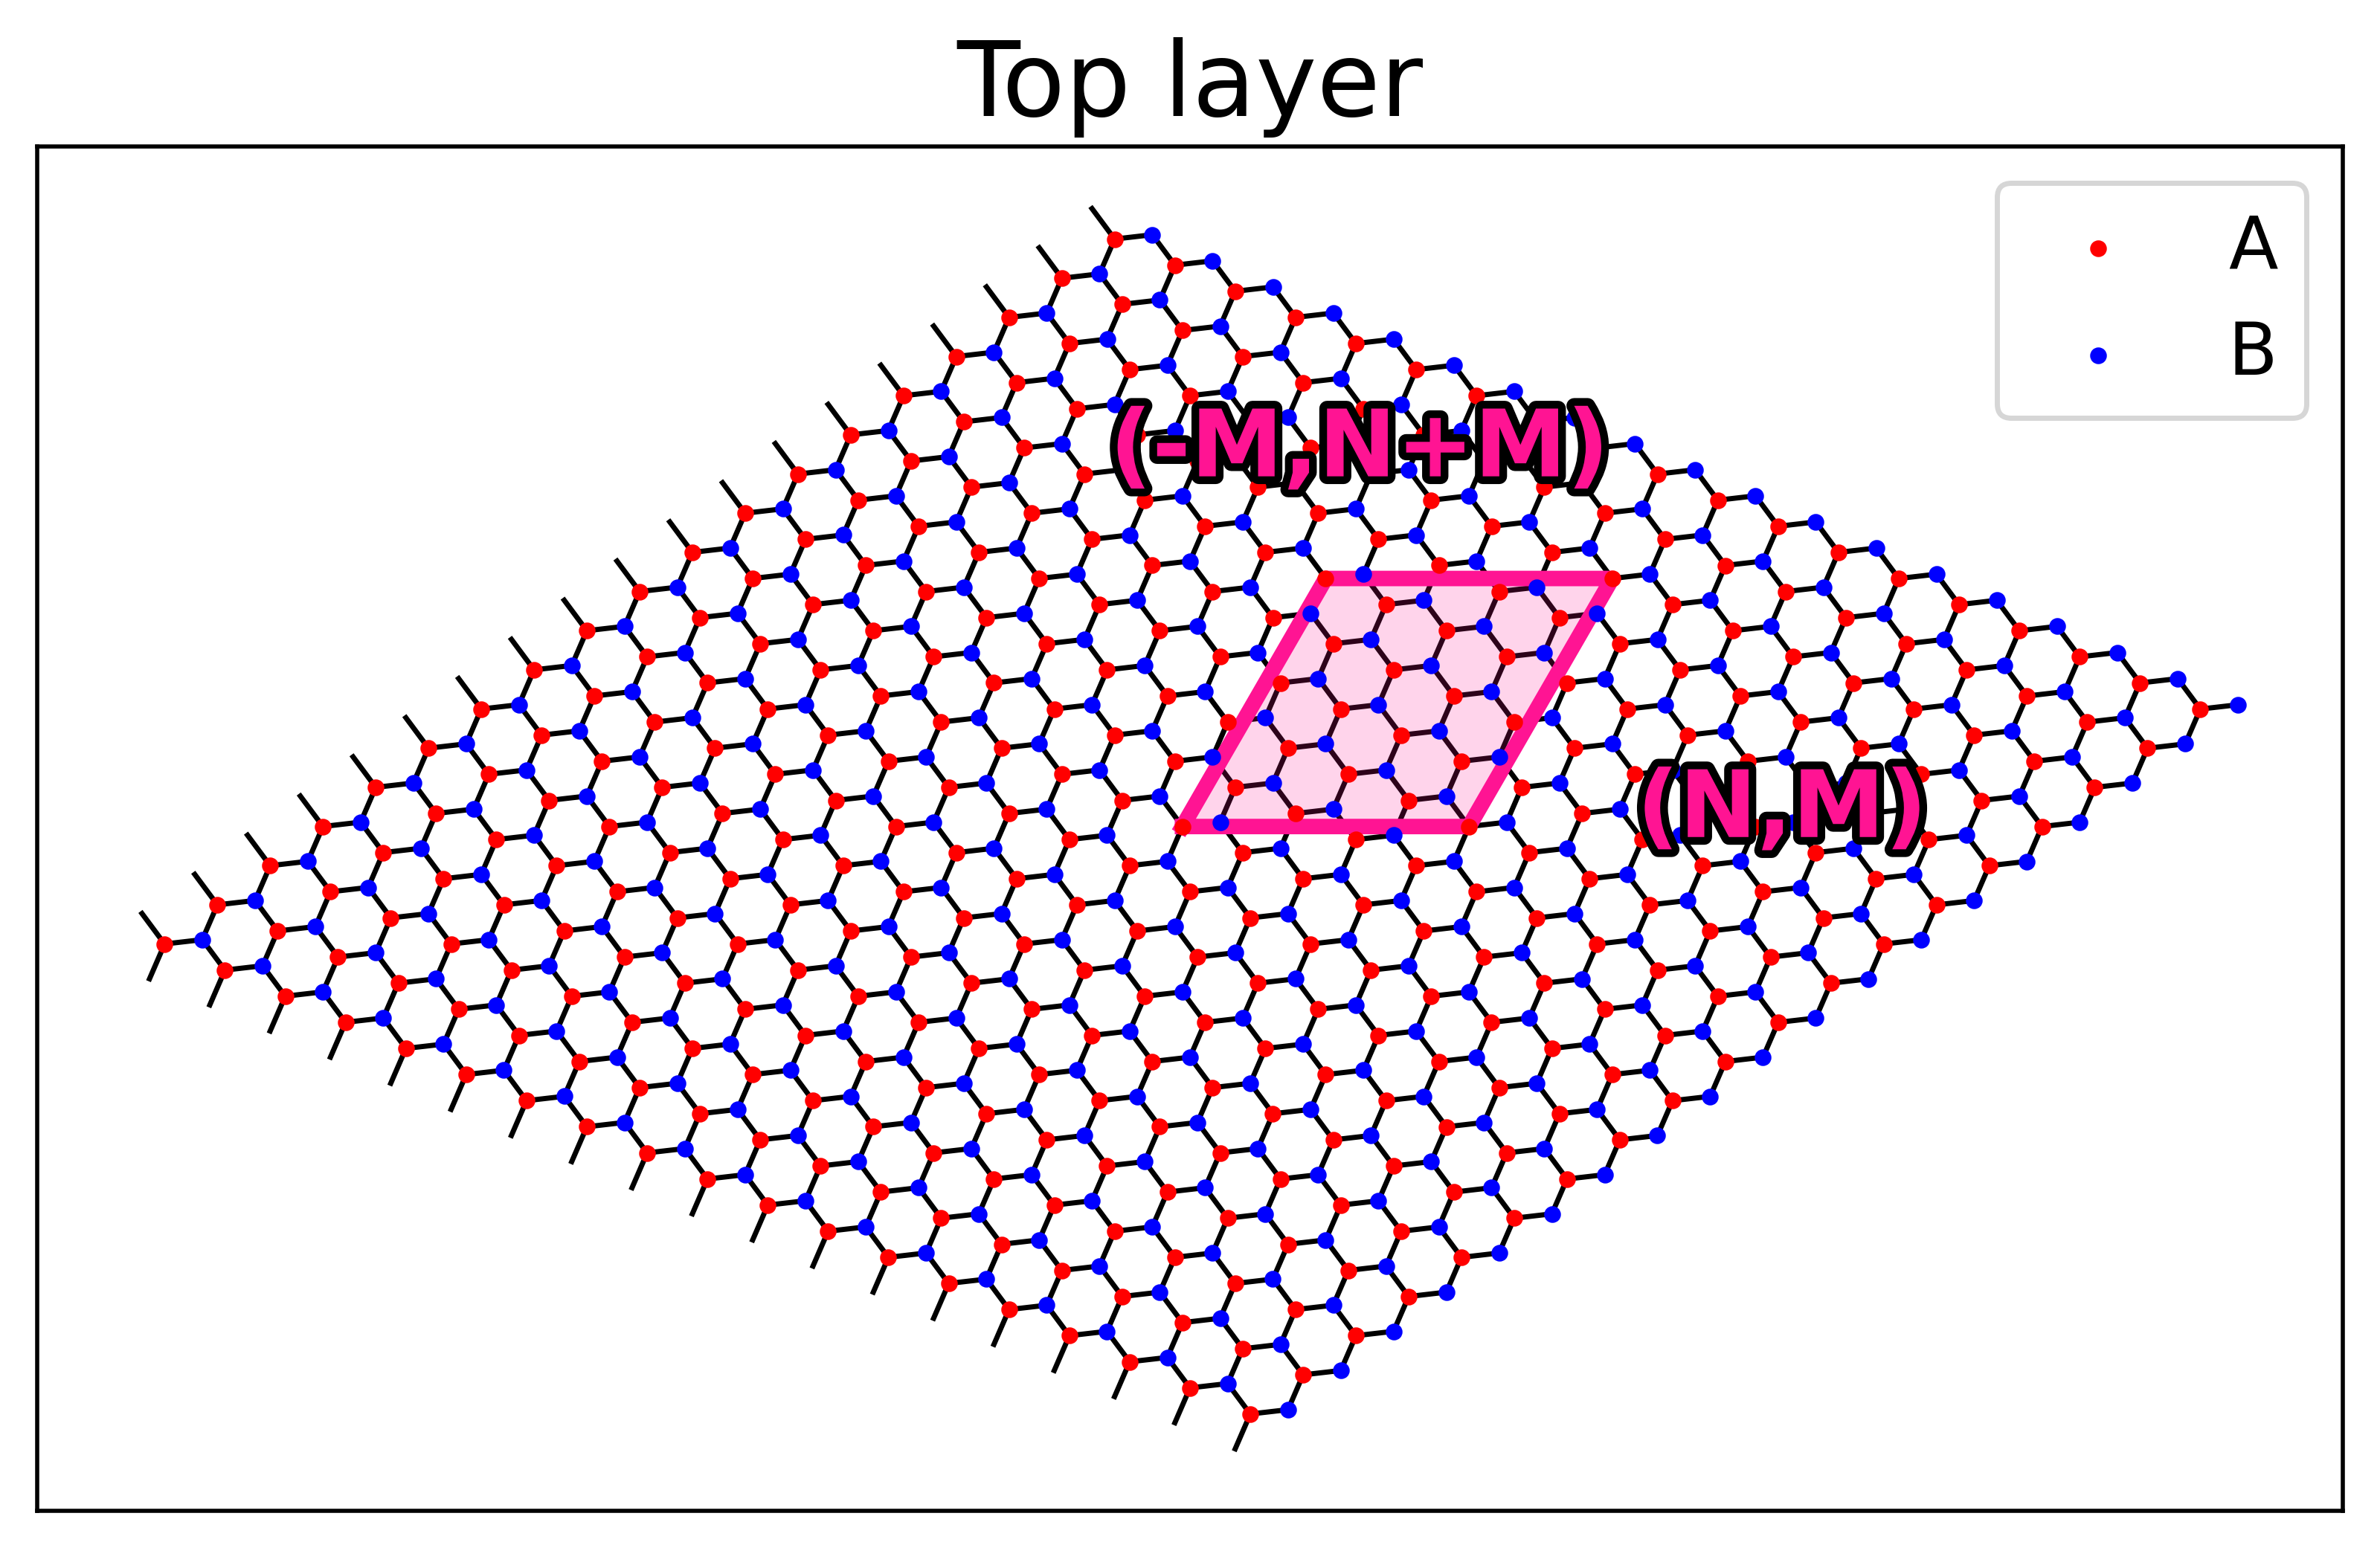

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def rotate_points(xy, theta_deg):
    """Rotate (N,2) array xy by theta_deg degrees about the origin."""
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return xy @ R.T

def plot_single_supercell_red(N, M, n1=9, n2=9, theta_deg=0):
    # Primitive lattice vectors
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # B-sublattice offset

    # Generate lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    # === Rotate all sites and bonds by +theta_deg about the origin (counter-clockwise) ===
    A = rotate_points(A, +theta_deg)
    B = rotate_points(B, +theta_deg)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sites
    ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=5, label='A', zorder=6)
    ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=5, label='B', zorder=6)

    # Draw bonds for A sublattice
    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    # Rotate neighbor_vectors too!
    neighbor_vectors_rot = rotate_points(neighbor_vectors, +theta_deg)
    for r in A:
        for v in neighbor_vectors_rot:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the A site closest to the center (0,0) as the supercell origin
    A0 = A[np.argmin(np.linalg.norm(A, axis=1))]

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    # Rotate lattice vectors too!
    L1_red_rot = rotate_points(L1_red[None, :], +theta_deg)[0]
    L2_red_rot = rotate_points(L2_red[None, :], +theta_deg)[0]
    corners_red = np.array([
        A0,
        A0 + L1_red_rot,
        A0 + L1_red_rot + L2_red_rot,
        A0 + L2_red_rot,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='deeppink', alpha=0.18, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_red_rot[0], L1_red_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='deeppink', zorder=4)
    ax.arrow(A0[0], A0[1], L2_red_rot[0], L2_red_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='deeppink', zorder=4)

    # Label supercell vectors, farther from lines
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(*xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
                path_effects=[withStroke(linewidth=3, foreground='black')], zorder=200)

    offset_red1 = 2
    offset_red2 = 1.5
    label_with_outline(A0 + offset_red1*L1_red_rot + np.array([0.7, 0.4]), '(N,M)', 'deeppink', 18)
    label_with_outline(A0 + offset_red2*L2_red_rot + np.array([-1.0, 0.1]), '(-M,N+M)', 'deeppink', 18)

    ax.set_aspect('equal')
    ax.set_title('Top layer', fontsize=20)
    ax.legend(loc='upper right', fontsize=14)
    plt.show()

# Example usage
plot_single_supercell_red(N=3, M=2, theta_deg=13.17/2)

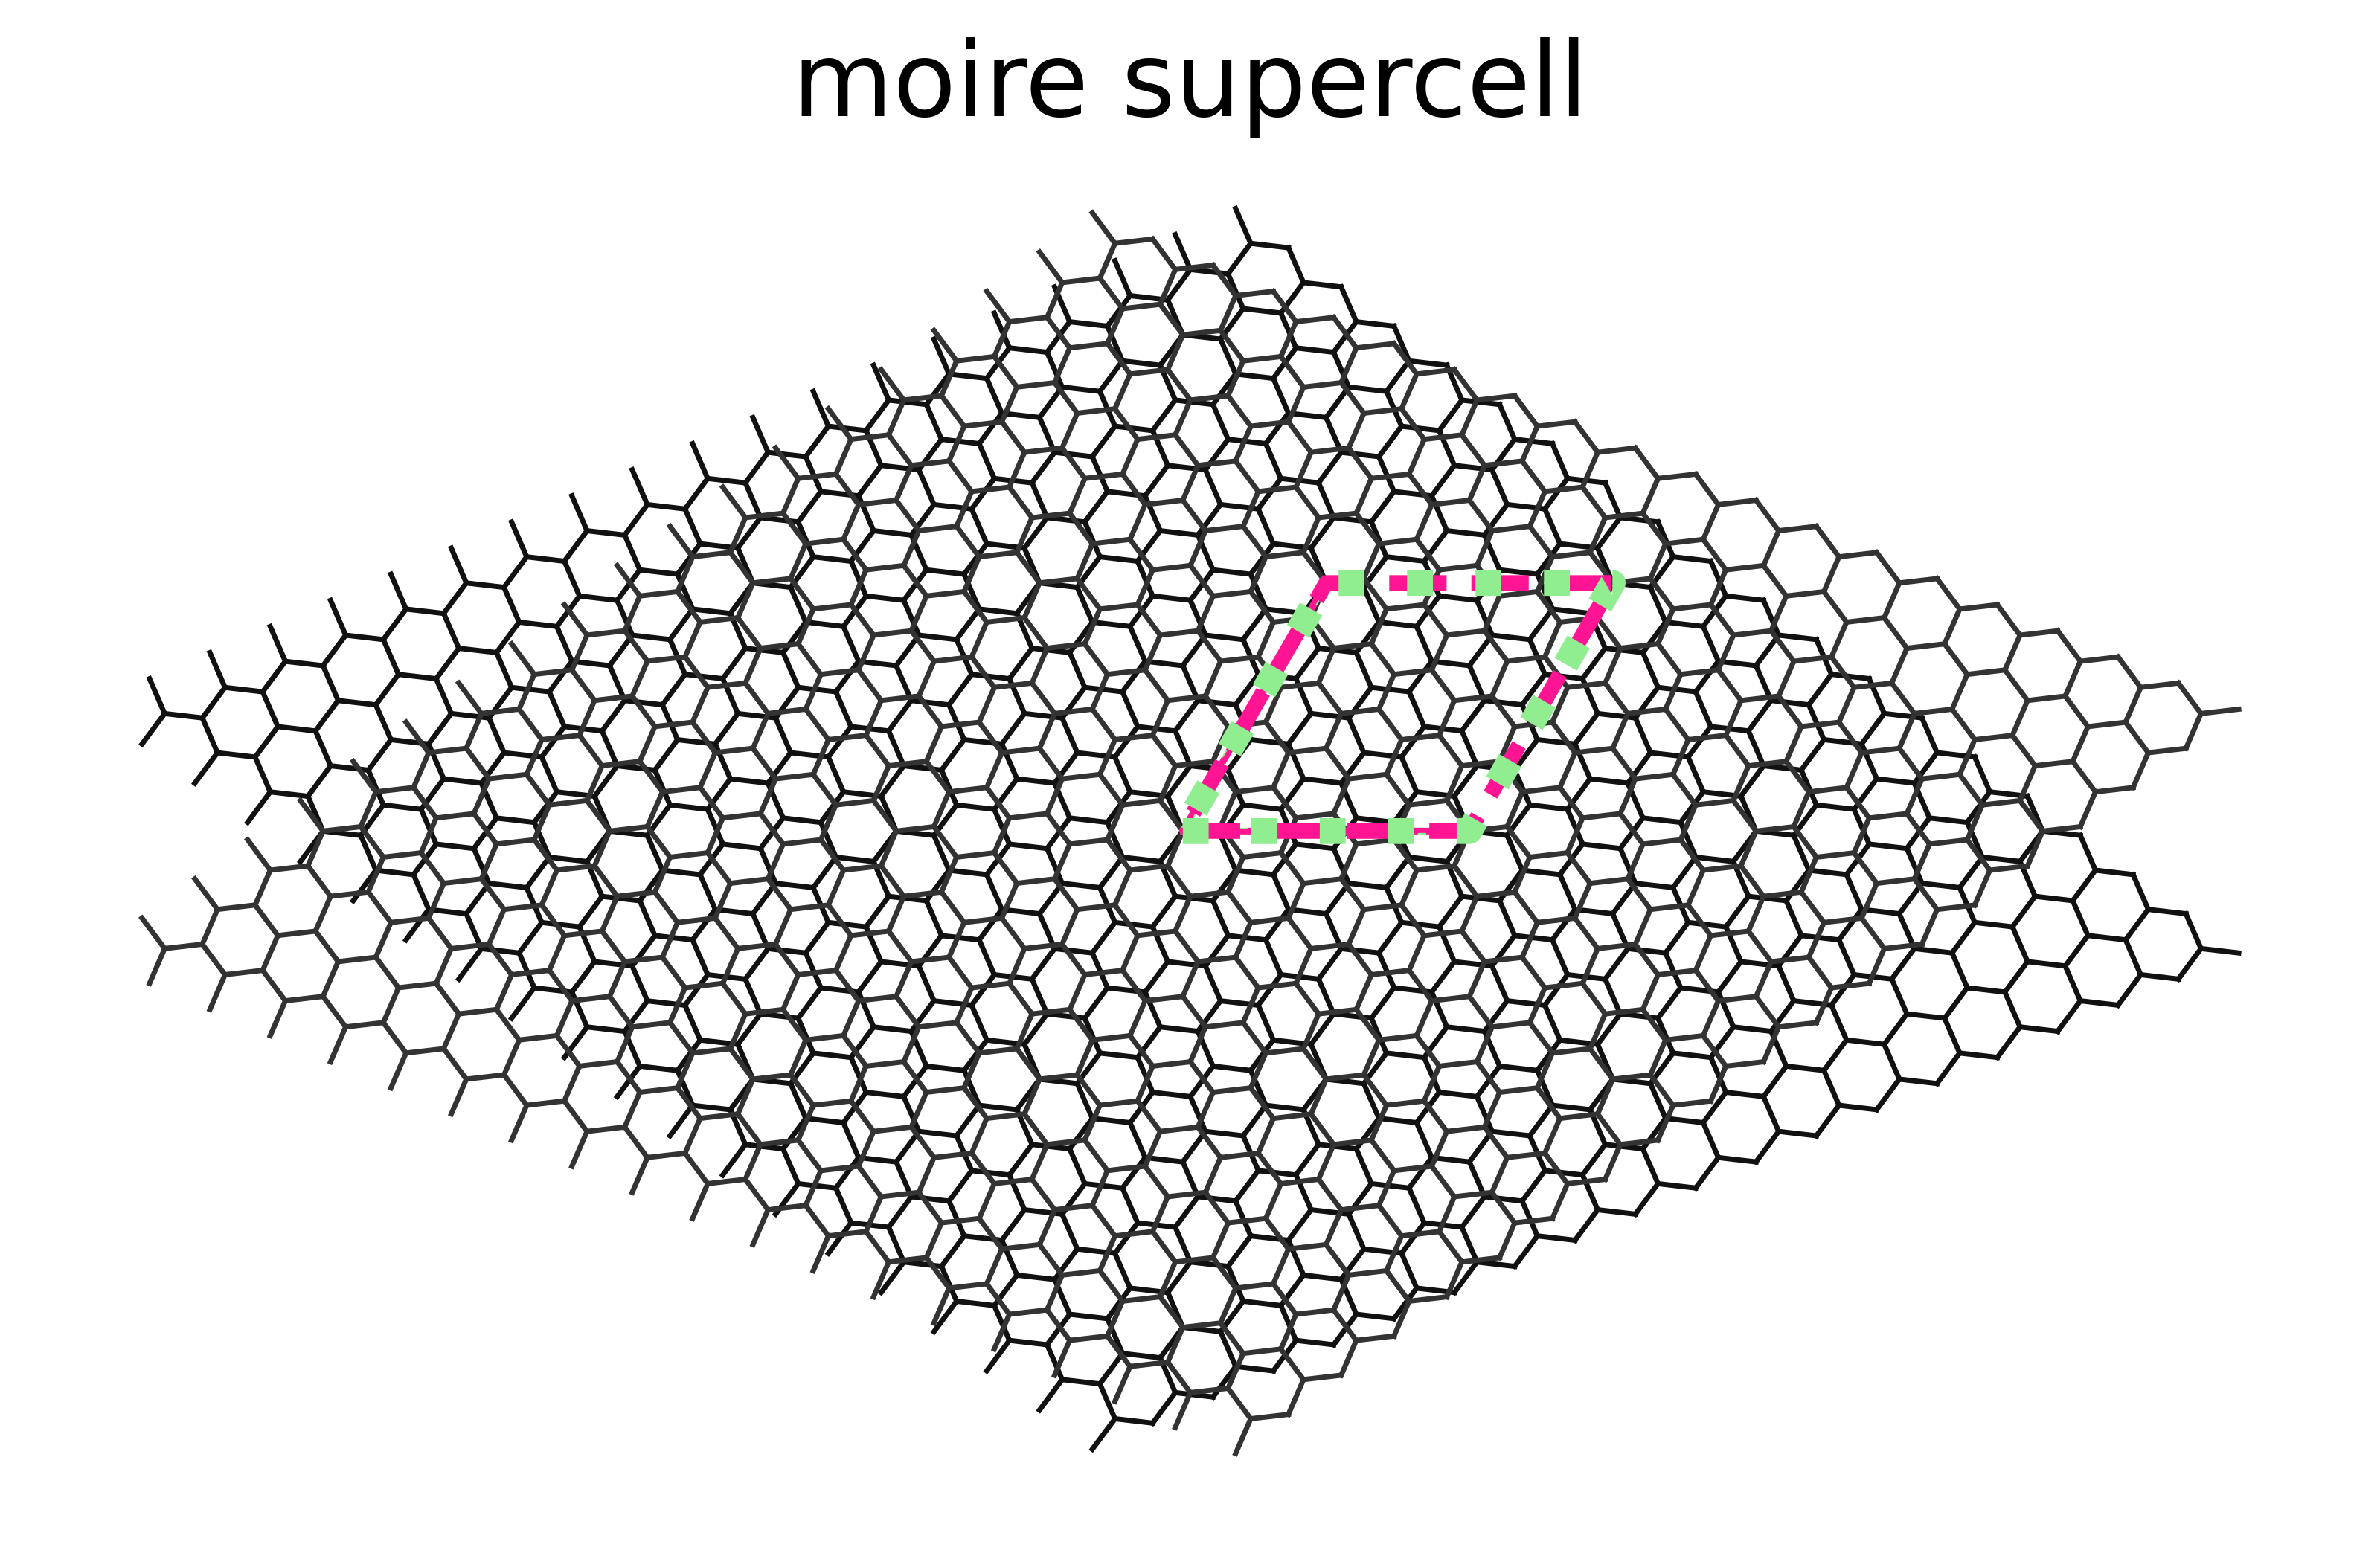

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def rotate_points(xy, theta_deg):
    """Rotate (N,2) array xy by theta_deg degrees about the origin."""
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return xy @ R.T

def plot_supercell_double(N, M, n1=9, n2=9, theta_deg=0):
    # Primitive lattice vectors
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # B-sublattice offset

    fig, ax = plt.subplots(figsize=(8, 8))

    # --- First layer: green, rotate -theta/2 (CW) ---
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)
    A = rotate_points(A, -theta_deg)
    B = rotate_points(B, -theta_deg)

    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    neighbor_vectors_rot = rotate_points(neighbor_vectors, -theta_deg)
    for r in A:
        for v in neighbor_vectors_rot:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='#111', lw=1, zorder=0)

    # Green supercell: (M,N)
    A0 = A[np.argmin(np.linalg.norm(A, axis=1))]
    L1_green = M * a1 + N * a2
    L2_green = -N * a1 + (M + N) * a2
    L1_green_rot = rotate_points(L1_green[None, :], -theta_deg)[0]
    L2_green_rot = rotate_points(L2_green[None, :], -theta_deg)[0]
    corners_green = np.array([
        A0,
        A0 + L1_green_rot,
        A0 + L1_green_rot + L2_green_rot,
        A0 + L2_green_rot,
        A0
    ])
    ax.plot(corners_green[:, 0], corners_green[:, 1], color='lightgreen', lw=5, zorder=300, linestyle='dotted')
    ax.arrow(A0[0], A0[1], L1_green_rot[0], L1_green_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='lightgreen', zorder=4)
    ax.arrow(A0[0], A0[1], L2_green_rot[0], L2_green_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='lightgreen', zorder=4)

    # --- Second layer: red, rotate +theta/2 (CCW) ---
    A_sites2, B_sites2 = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites2.append(r)
            B_sites2.append(r + delta)
    A2 = np.array(A_sites2)
    B2 = np.array(B_sites2)
    A2 = rotate_points(A2, +theta_deg)
    B2 = rotate_points(B2, +theta_deg)

    neighbor_vectors_rot2 = rotate_points(neighbor_vectors, +theta_deg)
    for r in A2:
        for v in neighbor_vectors_rot2:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='#333', lw=1, zorder=1)

    # Red supercell: (N,M) -- dashed
    A0_2 = A2[np.argmin(np.linalg.norm(A2, axis=1))]
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    L1_red_rot = rotate_points(L1_red[None, :], +theta_deg)[0]
    L2_red_rot = rotate_points(L2_red[None, :], +theta_deg)[0]
    corners_red = np.array([
        A0_2,
        A0_2 + L1_red_rot,
        A0_2 + L1_red_rot + L2_red_rot,
        A0_2 + L2_red_rot,
        A0_2
    ])
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, linestyle='--', zorder=4)
    ax.arrow(A0_2[0], A0_2[1], L1_red_rot[0], L1_red_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='deeppink', zorder=4, linestyle='--')
    ax.arrow(A0_2[0], A0_2[1], L2_red_rot[0], L2_red_rot[1], width=0.04, head_width=0.18,
             length_includes_head=True, color='deeppink', zorder=4, linestyle='--')

    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off() 
    ax.set_title('moire supercell', fontsize=20)
    # Legend removed!
    plt.show()

# Example usage
plot_supercell_double(N=3, M=2, theta_deg=13.17/2)

# moire supercell lattice vector derivation


---

**Primitive lattice vectors of the honeycomb lattice:**

$$
\begin{align*}
\vec{b}_1 &= \left( \frac{\sqrt{3}}{2},\ -\frac{1}{2} \right) \\
\vec{b}_2 &= \left( \frac{\sqrt{3}}{2},\ \frac{1}{2} \right)
\end{align*}
$$

Here, $\vec{b}_1$ and $\vec{b}_2$ are the primitive lattice vectors in Cartesian coordinates, describing the repeating structure of the 2D honeycomb lattice.

---

**Lattice matrix constructed from the primitive vectors:**

$$
\begin{align*}
B &= 
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
$$

Matrix $B$ uses $\vec{b}_1$ and $\vec{b}_2$ as its columns. This matrix is useful for transforming between lattice and Cartesian coordinates.

---

**General formula for the inverse of a $2\times2$ matrix:**

$$
\begin{align*}
B^{-1} = \frac{1}{\det(B)}
\begin{pmatrix}
b_{22} & -b_{12} \\
-b_{21} & b_{11}
\end{pmatrix}
\end{align*}
$$

$B^{-1}$ is the inverse of matrix $B$, written in terms of the matrix elements $b_{ij}$. This formula applies to any $2\times2$ matrix.

---

**Explicit calculation of $B^{-1}$ for the honeycomb lattice:**

$$
B^{-1} = \frac{2}{\sqrt{3}}
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{1}{2} & \frac{\sqrt{3}}{2}
\end{pmatrix}
= \begin{pmatrix}
\frac{1}{\sqrt{3}} & -1 \\
\frac{1}{\sqrt{3}} & 1
\end{pmatrix}
$$

By substituting the specific entries of $B$ and its determinant, we get this explicit inverse for the honeycomb lattice.

---

**Definition of the Gram matrix (metric tensor):**

$$
\begin{align*}
G &= B^{T} B = 
\begin{pmatrix}
\frac{\sqrt{3}}{2} & -\frac{1}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix} =
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1
\end{pmatrix}
$$

The Gram matrix $G$ encodes the inner products of the lattice vectors, capturing geometric properties such as lengths and angles in the lattice.

---

**Supercell basis vector 1:**

$$
\begin{align*}
\vec{b}_1' = (N, M)
\end{align*}
$$

Here, $\vec{b}_1'$ defines the first supercell lattice vector as an integer linear combination of the original basis vectors.

---

**Supercell basis vector 2 via $60^\circ$ rotation:**

$$
\begin{align*}
\vec{b}_2' = R_\mathrm{basis}(60^\circ)\ \vec{b}_1'
\end{align*}
$$

The second supercell vector $\vec{b}_2'$ is obtained by rotating $\vec{b}_1'$ by $60^\circ$ in the basis coordinate system.

---

**$60^\circ$ rotation matrix in Cartesian coordinates:**

$$
\begin{align*}
R_\mathrm{cart}(60^\circ) = 
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
$$

This matrix rotates a vector by $60^\circ$ counterclockwise in Cartesian space.

---

**$60^\circ$ rotation matrix in lattice basis:**

$$
\begin{align*}
R_\mathrm{basis} = B^{-1} R_\mathrm{cart} B
\end{align*}
$$

To rotate in lattice coordinates, sandwich the Cartesian rotation matrix between $B^{-1}$ and $B$.

---

**Explicit calculation of $R_\mathrm{basis}$:**

$$
\begin{align*}
R_\mathrm{basis} &=
\begin{pmatrix} 
\frac{1}{\sqrt{3}} & -1 \\ 
\frac{1}{\sqrt{3}} & 1 
\end{pmatrix}
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
\\[1em]
&=
\begin{pmatrix}
\frac{1}{\sqrt{3}} & -1 \\
\frac{1}{\sqrt{3}} & 1
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & 0 \\
\frac{1}{2} & 1
\end{pmatrix} =
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

Step-by-step calculation of the rotation matrix in the lattice basis, starting from its definition in terms of $B$, $B^{-1}$, and $R_\mathrm{cart}(60^\circ)$.

---

**Final $60^\circ$ rotation matrix in basis coordinates:**

$$
\begin{align*}
R_\mathrm{basis} = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

The final form of the rotation matrix in the lattice basis.

---

**Formula for the second supercell basis vector after rotation:**

$$
\begin{align*}
\Rightarrow\ 
\vec{b}_2' = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
N \\
M
\end{pmatrix}
=
\begin{pmatrix}
-M \\
N + M
\end{pmatrix}
\end{align*}
$$

Applying the rotation to $\vec{b}_1'$ gives the explicit expression for the second supercell basis vector, $\vec{b}_2'$.

---

**Supercell basis vector 1:**

$$
\begin{align*}
\vec{b}_1' = (N, M)
\end{align*}
$$

Here, $\vec{b}_1'$ defines the first supercell lattice vector as an integer linear combination of the original basis vectors.

---

**Supercell basis vector 2 via $60^\circ$ rotation:**

$$
\begin{align*}
\vec{b}_2' = R_\mathrm{basis}(60^\circ)\ \vec{b}_1'
\end{align*}
$$

The second supercell vector $\vec{b}_2'$ is obtained by rotating $\vec{b}_1'$ by $60^\circ$ in the basis coordinate system.

---

**$60^\circ$ rotation matrix in Cartesian coordinates:**

$$
\begin{align*}
R_\mathrm{cart}(60^\circ) = 
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
$$

This matrix rotates a vector by $60^\circ$ counterclockwise in Cartesian space.

---

**$60^\circ$ rotation matrix in lattice basis:**

$$
\begin{align*}
R_\mathrm{basis} = B^{-1} R_\mathrm{cart} B
\end{align*}
$$

To rotate in lattice coordinates, sandwich the Cartesian rotation matrix between $B^{-1}$ and $B$.

---

**Explicit calculation of $R_\mathrm{basis}$:**

$$
\begin{align*}
R_\mathrm{basis} &=
\begin{pmatrix} 
\frac{1}{\sqrt{3}} & -1 \\ 
\frac{1}{\sqrt{3}} & 1 
\end{pmatrix}
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
\\[1em]
&=
\begin{pmatrix}
\frac{1}{\sqrt{3}} & -1 \\
\frac{1}{\sqrt{3}} & 1
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & 0 \\
\frac{1}{2} & 1
\end{pmatrix} =
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

Step-by-step calculation of the rotation matrix in the lattice basis, starting from its definition in terms of $B$, $B^{-1}$, and $R_\mathrm{cart}(60^\circ)$.

---

**Final $60^\circ$ rotation matrix in basis coordinates:**

$$
\begin{align*}
R_\mathrm{basis} = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

The final form of the rotation matrix in the lattice basis.

---

**Formula for the second supercell basis vector after rotation:**

$$
\begin{align*}
\Rightarrow\ 
\vec{b}_2' = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
N \\
M
\end{pmatrix}
=
\begin{pmatrix}
-M \\
N + M
\end{pmatrix}
\end{align*}
$$

Applying the rotation to $\vec{b}_1'$ gives the explicit expression for the second supercell basis vector, $\vec{b}_2'$.

---

---

**Supercell basis vector 1:**

$$
\begin{align*}
\vec{b}_1' = (M, N)
\end{align*}
$$

Here, $\vec{b}_1'$ defines the first supercell lattice vector as an integer linear combination of the original basis vectors.

**Formula for the second supercell basis vector after rotation:**

$$
\begin{align*}
\Rightarrow\ 
\vec{b}_2' = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
M \\
N
\end{pmatrix}
=
\begin{pmatrix}
-N \\
N + M
\end{pmatrix}
\end{align*}
$$

Applying the rotation to $\vec{b}_1'$ gives the explicit expression for the second supercell basis vector, $\vec{b}_2'$.

---

# moire supercell twist angle derivation (homobilayer)

**For homobilayer, $\theta$ is determined by the angle between $(N, M)$ and $(M, N)$:**

$$
\vec{u} = 
\begin{pmatrix}
N \\
M
\end{pmatrix}
,\quad
\vec{v} = 
\begin{pmatrix}
M \\
N
\end{pmatrix}
$$

---

**The cosine of the angle between $\vec{u}$ and $\vec{v}$:**

$$
\cos\theta = \frac{\vec{u} \cdot \vec{v}}{|\vec{u}||\vec{v}|}
$$

This is the standard definition of the angle between two vectors.

---

**Generalized inner product using the lattice Gram matrix:**

$$
\vec{u} \cdot \vec{v} = \vec{u}^{\,T} G \vec{v} =
\begin{pmatrix} N & M \end{pmatrix}
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1
\end{pmatrix}
\begin{pmatrix} M \\ N \end{pmatrix}
$$

$$
=
\begin{pmatrix} N & M \end{pmatrix}
\begin{pmatrix}
\frac{1}{2}N + M \\
N + \frac{1}{2}M
\end{pmatrix}
$$

$$
= \frac{1}{2} (N^2 + 4NM + M^2)
$$

The Gram matrix $G$ encodes the geometric information of the lattice. (This term is needed for non-orthogonal basis)

---

**The squared norm of either vector:**

$$
|\vec{u}|^2 = |\vec{v}|^2 = \vec{u} \cdot \vec{u} = \vec{u}^{\,T} G \vec{u}
= (N, M)
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1
\end{pmatrix}
\begin{pmatrix}
N \\ M
\end{pmatrix}
$$

$$
= (N, M)
\begin{pmatrix}
N + \frac{1}{2}M \\
\frac{1}{2}N + M
\end{pmatrix}
= N^2 + NM + M^2
$$

---

**Final formula for the twist angle cosine:**

$$
\Rightarrow\ 
\cos\theta = \frac{N^2 + 4NM + M^2}{2(N^2 + NM + M^2)}
$$

This formula gives the cosine of the angle between the first supercell basis vectors $\vec{b}_1'$ of the top and bottom layers, which also corresponds to the twist angle of the homobilayer moiré superlattice.

# moire supercell lattice constant & number of atoms

$$
|\vec{u}|^2 = |\vec{v}|^2 = N^2 + NM + M^2
$$

$$
L_\mathrm{cell} = a \sqrt{N^2 + NM + M^2}
$$

---

Therefore, this supercell has $N^2 + NM + M^2$ unit cells.

Therefore, it has $3(N^2 + NM + M^2)$ atoms per layer.